# Temporal Dynamics and Volatility Analysis of the PHP-USD exchange Rate

This study examines the temporal behaviour, volatility, and structural shift of the PHP-USD exchaange rate from 2010-2024, revealing how the pesos strength response to domestic policies, global trends, and major economic events. It highlights the exchange rate as the dynamic indicator of national economic stability rather than an isolated metric.

# Libraries

Required Libraries

1. `pandas` - This is the primary tool for data manipulation and analysis. It introduces the "DataFrame" structure, which allows you to store and manipulate tabular data (like Excel spreadsheets) easily. It is used for cleaning, filtering, and transforming your exchange rate data.

2. `numpy` - Short for Numerical Python, this is the fundamental library for scientific computing. It provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions to operate on these arrays efficiently.
3. `matplotlib` - This is a basic plotting library used to create static, animated, and interactive visualizations. In notebook, it serves as the engine for drawing the lines, axes, and labels for currency trend graphs.
4. `seaborn` - Built on top of Matplotlib, Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. It simplifies the process of making complex plots (like heatmaps or distribution plots) look professional with better default colors and styles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

Data preparation is necessary to ensure that analyses reflect real economic patterns rather than errors caused by inconsistent formats or missing values. Initial inspection of structure and completeness helps identify issues that could bias trend, seasonality, or volatility analysis.

The datasets were collected from multiple sources and organized for systematic inspection prior to analysis. Initial checks of data structure, data types, and missing values were conducted to assess data quality and consistency across variables.

Columns containing missing values were removed to reduce noise and ensure comparability when integrating datasets. These data preparation steps establish a clean and reliable foundation for exploratory analysis, allowing observed patterns in the PHP–USD exchange rate to reflect underlying economic dynamics rather than data inconsistencies.

In [2]:
# Datasets are located in the datasets folder.

# USD-PHP Exchange Rate
exchangeRate = pd.read_csv("../datasets/USD_PHP Historical Data.csv")

# Inflation Rates
inflationPh = pd.read_csv("../datasets/PH Core Inf Rate monthly.csv")
inflationUS = pd.read_csv("../datasets/USA Core Inf Rate.csv")

# Interest Rates
interestRatePh = pd.read_csv("../datasets/BSP Interest Rate in percent.csv")
interestRateUS = pd.read_csv("../datasets/DFF Interest Rate.csv")

# Oil prices
oilPriceBrent = pd.read_csv("../datasets/Brent Oil Futures Historical Data.csv")
oilPriceCrude = pd.read_csv("../datasets/Crude Oil WTI Futures Historical Data.csv")

# merchandise imports and exports
importsPh = pd.read_csv("../datasets/Imports Ph.csv")
exportsPh = pd.read_csv("../datasets/Exports Ph.csv")

# OFW Remittance
ofwRemittance = pd.read_csv("../datasets/OFW Remittance.csv")


In [3]:
datasets = {
    "exchangeRate": exchangeRate,
    "inflationPh": inflationPh,
    "inflationUS": inflationUS,
    "interestRateUS": interestRateUS,
    "interestRatePh": interestRatePh,
    "oilPriceBrent": oilPriceBrent,
    "oilPriceCrude": oilPriceCrude,
    "ofwRemittance": ofwRemittance,
    "importsPh": importsPh,
    "exportsPh": exportsPh
}

# Iterate over the datasets and inspect their head

for k, i in datasets.items():
    head = i.head()
    print(f"{k}")
    print(f"{head}\n\n")

exchangeRate
         Date   Price    Open    High     Low Vol. Change %
0  12/08/2025  59.098  58.993  59.395  58.890  NaN    0.27%
1  12/05/2025  58.940  59.131  59.141  58.899  NaN   -0.32%
2  12/04/2025  59.130  58.942  59.213  58.905  NaN    0.22%
3  12/03/2025  58.999  58.557  59.096  58.522  NaN    0.60%
4  12/02/2025  58.647  58.456  58.784  58.334  NaN    0.40%


inflationPh
   Year     Month  Unnamed: 2  Inflation Rate  Unnamed: 4
0  1958   January         NaN             6.3         NaN
1  1958  February         NaN             6.3         NaN
2  1958     March         NaN             5.5         NaN
3  1958     April         NaN             5.5         NaN
4  1958       May         NaN             6.3         NaN


inflationUS
  observation_date  CORESTICKM159SFRBATL
0       1968-01-01              3.651861
1       1968-02-01              3.673819
2       1968-03-01              4.142164
3       1968-04-01              4.155828
4       1968-05-01              4.088245


int

In [4]:
# Iterate over the datasets and inspect their info

for k, i in datasets.items():
    print(f"{k}")
    i.info()
    print(f"\n\n")

exchangeRate
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2071 non-null   object 
 1   Price     2071 non-null   float64
 2   Open      2071 non-null   float64
 3   High      2071 non-null   float64
 4   Low       2071 non-null   float64
 5   Vol.      1058 non-null   object 
 6   Change %  2071 non-null   object 
dtypes: float64(4), object(3)
memory usage: 113.4+ KB



inflationPh
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            814 non-null    int64  
 1   Month           814 non-null    object 
 2   Unnamed: 2      0 non-null      float64
 3   Inflation Rate  814 non-null    float64
 4   Unnamed: 4      0 non-null      float64
dtypes: float64(3), int64(1), object(1)
me

In [5]:
# Iterate over the datasets to get their shape and number of null values

for k, i in datasets.items():
    shape = i.shape
    null = i.isna().sum()
    print(f"{k}")
    print(f"shape: {shape}\n{null}\n\n")

exchangeRate
shape: (2071, 7)
Date           0
Price          0
Open           0
High           0
Low            0
Vol.        1013
Change %       0
dtype: int64


inflationPh
shape: (814, 5)
Year                0
Month               0
Unnamed: 2        814
Inflation Rate      0
Unnamed: 4        814
dtype: int64


inflationUS
shape: (693, 2)
observation_date        0
CORESTICKM159SFRBATL    0
dtype: int64


interestRateUS
shape: (2896, 2)
observation_date    0
DFF                 0
dtype: int64


interestRatePh
shape: (10404, 3)
Period            0
RRP Rate          0
Unnamed: 2    10404
dtype: int64


oilPriceBrent
shape: (2050, 7)
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


oilPriceCrude
shape: (2086, 7)
Date         0
Price        0
Open         0
High         0
Low          0
Vol.        84
Change %     0
dtype: int64


ofwRemittance
shape: (93, 3)
Year                     0
Month                    0
levels in m

In [6]:
# Dropping the null values

for k, i in datasets.items():
    i.dropna(axis=1, inplace=True)
    print(f"{k}")
    info = i.info()
    print("\n\n")

exchangeRate
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2071 non-null   object 
 1   Price     2071 non-null   float64
 2   Open      2071 non-null   float64
 3   High      2071 non-null   float64
 4   Low       2071 non-null   float64
 5   Change %  2071 non-null   object 
dtypes: float64(4), object(2)
memory usage: 97.2+ KB



inflationPh
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            814 non-null    int64  
 1   Month           814 non-null    object 
 2   Inflation Rate  814 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 19.2+ KB



inflationUS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 2 

# Preprocessing

### Exchange Rate

The exchange rate dataset was preprocessed to ensure temporal consistency and numerical validity for exploratory time series analysis. The `Date` column was converted into a standardized datetime format, sorted chronologically, and set as the index. This step is essential for analyzing trends, seasonality, and volatility over time, as well as for resampling the data into weekly or monthly frequencies.

Additionally, the `Change %` column was cleaned by removing percentage symbols and converting values into numeric form, allowing meaningful statistical analysis of exchange rate movements. The price column was also renamed to `Price USD–PHP` to improve clarity and interpretability in subsequent analyses.

Overall, these preprocessing steps produce a clean and structured time series suitable for exploring temporal dynamics and volatility in the PHP–USD exchange rate.

In [7]:
# converting the datetime into ISO Format and making it its index

exchangeRate['Date'] = pd.to_datetime(exchangeRate['Date'], format='mixed')

exchangeRate.sort_values(by='Date', inplace=True)
exchangeRate.set_index('Date', inplace=True)

In [8]:
# processing the change % string into numeric and renaming a column

if exchangeRate['Change %'].dtype == 'object':
    exchangeRate['Change %'] = exchangeRate['Change %'].str.replace('%', '', regex=False)

exchangeRate.rename(columns={
    "Price": "Price USD-PHP"
}, inplace=True)

exchangeRate['Change %'] = pd.to_numeric(exchangeRate['Change %'])

### Inflation US and Ph

The inflation datasets for the Philippines and the United States were preprocessed to ensure temporal alignment and consistency for comparative analysis. For the Philippine data, separate `Year` and `Month` columns were combined to construct a unified datetime variable, which was then set as the index. This transformation enables proper time series analysis and synchronization with other monthly macroeconomic indicators. The original year and month columns were subsequently removed to reduce redundancy, and the inflation rate column was renamed for clarity.

For the US inflation data, the date variable was converted into a standardized datetime format and sorted chronologically. The original observation date column was dropped, and the inflation rate variable was renamed to clearly distinguish it from the Philippine inflation series. Setting the date as the index for both datasets ensures consistent temporal structure, allowing meaningful comparison of inflation trends and their relationship to exchange rate movements.

In [9]:
# fixing the date by combining two columns and droppng them

inflationPh["Date"] = pd.to_datetime(
    inflationPh["Year"].astype(str) + "-" + inflationPh["Month"] + "-01",
    format="%Y-%B-%d",
    errors="coerce"
)

inflationPh.drop(columns=["Year", "Month"], inplace=True)

inflationPh.rename(columns={
    "Inflation Rate": "Inflation Rate Ph"
}, inplace=True)

inflationPh.set_index('Date', inplace=True)

In [10]:
# converting the date into ISO format and renaming the column

inflationUS['Date'] = pd.to_datetime(inflationUS['observation_date'], format='mixed')

inflationUS.drop(columns=['observation_date'], inplace=True)
inflationUS.sort_values(by='Date', inplace=True)
inflationUS.rename(columns={
    "CORESTICKM159SFRBATL": "Inflation Rate US"
}, inplace=True)
inflationUS.set_index('Date', inplace=True)

### Interest Rate Ph and US

The interest rate datasets for the Philippines and the United States were preprocessed to ensure consistency, clarity, and suitability for time series analysis. For the Philippine data, columns were renamed to clearly identify the policy rate (`RRP Ph`) and the corresponding time variable. The date column was converted into a standardized datetime format, sorted chronologically, and set as the index to support temporal analysis.

Non-numeric placeholders in the Philippine policy rate series were replaced with appropriate missing or zero values and subsequently converted into numeric form. This step ensures that statistical summaries and trend analyses of interest rates are valid and not distorted by formatting artifacts.

For the US data, the observation date was similarly standardized and set as the index, and the policy rate variable was renamed (`DFF US`) to clearly distinguish it from the Philippine series. Aligning both datasets along a common datetime index enables meaningful comparison of interest rate movements and their potential influence on USD–PHP exchange rate dynamics.

In [11]:
# Renaming the column and converting the date into iso format

interestRatePh.rename(columns={
    "Period": "Date",
    "RRP Rate": "RRP Ph"
}, inplace=True)

interestRatePh['Date'] = pd.to_datetime(interestRatePh['Date'], format='mixed')

interestRatePh.sort_values(by='Date', inplace=True)
interestRatePh.set_index('Date', inplace=True)

In [12]:
# converting the placeholders in RRP rate

placeholders = {
    "-": np.nan,
    ".": 0.0,
    "..": 0.0,
    "...": np.nan
}

interestRatePh['RRP Ph'] = interestRatePh['RRP Ph'].replace(placeholders)
interestRatePh['RRP Ph'] = pd.to_numeric(interestRatePh['RRP Ph'])

In [13]:
# converting the dates into iso format

interestRateUS.rename(columns={
    "observation_date": "Date",
    "DFF": "DFF US"
}, inplace=True)

interestRateUS['Date'] = pd.to_datetime(interestRateUS['Date'], format='mixed')

interestRateUS.sort_values(by='Date', inplace=True)
interestRateUS.set_index('Date', inplace=True)

### OFW Remittance

The OFW remittance dataset was preprocessed to ensure temporal consistency and numerical accuracy for time series exploration. Separate `Year` and `Month` columns were combined to construct a standardized monthly datetime index, enabling alignment with other macroeconomic indicators. The original year and month columns were removed to simplify the dataset structure.

Remittance values, originally stored as formatted strings with thousand separators, were cleaned and converted into numeric form. The remittance column was also renamed to `Remittance (in million USD)` for improved clarity and interpretability. These steps produce a clean, chronologically indexed dataset suitable for analyzing remittance trends and their potential relationship with PHP–USD exchange rate movements.

In [14]:
ofwRemittance["Date"] = pd.to_datetime(
    ofwRemittance["Year"].astype(str) + "-" + ofwRemittance["Month"] + "-01",
    format="%Y-%B-%d",
    errors="coerce"
)

ofwRemittance["levels in million USD"] = pd.to_numeric(
    ofwRemittance["levels in million USD"].str.replace(',', '', regex=False),
    errors='coerce'
)

ofwRemittance.rename(columns={
    "levels in million USD": "Remittance (in million USD)"
}, inplace=True)

ofwRemittance.drop(columns=["Year", "Month"], inplace=True)

ofwRemittance.set_index('Date', inplace=True)

### Oil Prices Brent and Crude

The Brent and Crude oil price datasets were preprocessed to ensure temporal alignment and numerical consistency for exploratory analysis. For both datasets, date variables were converted into a standardized datetime format, sorted chronologically, and set as the index. This step enables proper time series analysis and synchronization with exchange rate and macroeconomic indicators.

Price-related columns were renamed to clearly distinguish between Brent and Crude benchmarks, improving interpretability when comparing movements across oil markets. Percentage change variables, originally stored as strings, were cleaned by removing percentage symbols and converted into numeric form, allowing valid analysis of price volatility and shocks. Trading volume data for Brent oil were removed due to inconsistencies and limited analytical relevance.

Overall, these preprocessing steps produce clean, well-structured oil price time series suitable for examining energy price fluctuations and their potential influence on inflation dynamics and PHP–USD exchange rate volatility.

In [15]:
# converting the dates into iso format

oilPriceBrent['Date'] = pd.to_datetime(oilPriceBrent['Date'], format='mixed')

oilPriceBrent.sort_values(by='Date', inplace=True)
oilPriceBrent.set_index('Date', inplace=True)

In [16]:
# processing the change % string into numeric

if oilPriceBrent['Change %'].dtype == 'object':
    oilPriceBrent['Change %'] = oilPriceBrent['Change %'].str.replace('%', '', regex=False)

oilPriceBrent.rename(columns={
    "Price": "Price Brent",
    "Open": "Open_Brent",
    "High": "High_Brent",
    "Low": "Low_Brent",
    "Vol.": "Vol_Brent",
    "Change %": "Change % Brent"
}, inplace=True)

oilPriceBrent.drop(columns=['Vol_Brent'], inplace=True)

oilPriceBrent['Change % Brent'] = pd.to_numeric(oilPriceBrent['Change % Brent'])

In [17]:
# converting the dates into iso format

oilPriceCrude['Date'] = pd.to_datetime(oilPriceCrude['Date'], format='mixed')

oilPriceCrude.rename(columns={
    "Price": "Price Crude",
    "Open": "Open_Crude",
    "High": "High_Crude",
    "Low": "Low_Crude",
    "Change %": "Change % Crude"
}, inplace=True)

oilPriceCrude.sort_values(by='Date', inplace=True)
oilPriceCrude.set_index('Date', inplace=True)

In [18]:
# processing the change % string into numeric

if oilPriceCrude['Change % Crude'].dtype == 'object':
    oilPriceCrude['Change % Crude'] = oilPriceCrude['Change % Crude'].str.replace('%', '', regex=False)
oilPriceCrude['Change % Crude'] = pd.to_numeric(oilPriceCrude['Change % Crude'])

### Merchandise Exports and Imports

In [19]:
# for the exports USA

tobeclean = {
       "exportsPh": exportsPh,
       "importsPh": importsPh
}

columns = ['Indicator Category', 'Indicator Code', 'Indicator',
              'Reporting Economy Code', 'Reporting Economy ISO3A Code',
              'Reporting Economy', 'Partner Economy Code', 'Partner Economy',
              'Product/Sector Classification Code', 'Product/Sector Classification',
              'Product/Sector Code', 'Product/Sector', 'Period Code',
              'Frequency Code', 'Frequency', 'Unit Code', 'Unit']

for k, i in tobeclean.items():

       i.drop(columns=columns, inplace=True)

       i["Date"] = pd.to_datetime(
       i["Year"].astype(str) + "-" + i["Period"] + "-01",
       format="%Y-%B-%d",
       errors="coerce"
       )

       i.drop(columns=["Year", "Period"], inplace=True)

       i.rename(columns={
       "Value": f"{k} value"
       }, inplace=True)

       i.sort_values(by='Date', inplace=True)

       i.set_index('Date', inplace=True)



### Combining and Selection of Time Period

The analysis window was explicitly restricted to the period from **January 2018 to August 2025** to enable meaningful comparison between pre-pandemic, pandemic, and post-pandemic phases. Defining a common start and end date ensures temporal consistency across all datasets and prevents bias arising from unequal data coverage. This timeframe captures key structural shifts associated with COVID-19 and its economic aftermath.

In [20]:
# start and end of date

start = "2018-01-01"
end   = "2025-08-30"

All preprocessed datasets were combined into a single unified dataset using an outer join on the datetime index. This approach preserves information from all sources while allowing for missing values where data are unavailable for specific periods. After integration, the dataset was filtered to the selected analysis window to maintain consistency.

To support macro-level trend and seasonality analysis, the combined dataset was resampled to a **monthly frequency** by computing mean values. Monthly aggregation reduces short-term noise inherent in high-frequency financial data and aligns variables such as inflation, interest rates, and remittances on a common temporal scale, facilitating clearer exploratory comparisons and interpretations.

In [21]:
# combining the datasets together into one big dataset called main

from functools import reduce

main = reduce(lambda left, right: left.join(right, how='outer'), datasets.values())
main = main.loc[start:end]
main.head()

,Price USD-PHP,Open,High,Low,Change %,Inflation Rate Ph,Inflation Rate US,DFF US,RRP Ph,Price Brent,...,Low_Brent,Change % Brent,Price Crude,Open_Crude,High_Crude,Low_Crude,Change % Crude,Remittance (in million USD),importsPh value,exportsPh value
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,49.919,49.919,50.032,49.919,-0.19,3.4,2.157823,1.33,0.0,NaN,...,NaN,NaN,60.24,60.26,60.28,60.15,-0.33,2379.0,9010.877523,5372.865733
2018-01-02,49.819,50.023,50.023,49.725,-0.20,NaN,NaN,1.42,3.0,66.57,...,66.24,-0.45,60.38,60.21,60.75,60.14,0.23,NaN,NaN,NaN
2018-01-03,49.819,49.917,49.952,49.764,0.00,NaN,NaN,1.42,3.0,67.84,...,66.40,1.91,61.55,60.37,61.83,60.28,1.94,NaN,NaN,NaN
2018-01-04,49.877,49.837,49.968,49.754,0.12,NaN,NaN,1.42,NaN,68.07,...,67.62,0.34,61.90,61.83,62.05,61.49,0.57,NaN,NaN,NaN
2018-01-05,49.779,49.855,49.929,49.691,-0.20,NaN,NaN,1.42,0.0,67.62,...,67.26,-0.66,61.41,61.80,61.96,61.07,-0.79,NaN,NaN,NaN


In [22]:
# resampling the dataset and convert it into monthly

main_monthly = main.resample('ME').mean()

# and dropping uneeded columns
columns = ['Open', 'High', 'Low', 'Change %', 
           'Open_Brent', 'High_Brent', 'Low_Brent', 'Change % Brent',
           'Open_Crude', 'High_Crude', 'Low_Crude', 'Change % Crude']

main_monthly.drop(columns=columns, inplace=True)

main_monthly.tail()

,Price USD-PHP,Inflation Rate Ph,Inflation Rate US,DFF US,RRP Ph,Price Brent,Price Crude,Remittance (in million USD),importsPh value,exportsPh value
Date,,,,,,,,,,
2025-04-30,56.808545,1.4,3.176690,4.33,4.928571,66.320476,62.911905,2664.0,11344.814855,6782.512717
2025-05-31,55.654455,1.3,3.159131,4.33,5.452381,63.791818,60.903913,2658.0,11583.281938,7314.571472
2025-06-30,56.343857,1.4,3.288774,4.33,5.100000,69.392381,67.326667,2987.0,12115.728039,7064.263131
2025-07-31,56.877174,0.9,3.419811,4.33,5.315217,69.416522,67.109565,3179.0,12440.107590,7349.570373
2025-08-31,57.076000,1.5,3.400000,4.33,4.750000,67.134286,63.910476,2977.0,11748.563674,7126.035844


#### Solving the trade balance for the Philippines and USA

We analyze the Philippine trade balance because it directly affects the supply and demand for foreign currency. A trade deficit increases the country’s need for USD to pay for imports, putting upward pressure on the USD–PHP rate, while a surplus has the opposite effect. The trade balance also embeds key macroeconomic shocks such as oil price volatility and pandemic‑related disruptions, making it an important variable for understanding exchange rate behavior during 2018–2025.

Trade Balance = Philippine Exports - Philippine Imports

In [23]:
main_monthly['Trade Balance'] = main_monthly['exportsPh value'] - main_monthly['importsPh value']

#### Solving the Interest Differential between USA and Philippines

We compute the interest rate differential (US rate – PH rate) because exchange rate movements are driven more by the relative stance of monetary policy than by absolute levels. The differential reflects the incentive for capital to move toward higher‑yielding currencies and is a core variable in interest parity models. Using a differential also reduces multicollinearity and provides a clearer economic interpretation of how changes in global vs. domestic interest rate environments impact USD–PHP movements.

Interest Diff = USA Interest Rate - Philippines Interest Rate

In [24]:
main_monthly['Interest_Diff'] = main_monthly["DFF US"] - main_monthly["RRP Ph"]

#### Solving the Inflation Differential

We compute the inflation differential (US inflation – PH inflation) to capture differences in purchasing power and cost‑of‑living trends between the two economies. Exchange rates tend to adjust in favor of the country with lower inflation, making the differential the relevant variable rather than each country’s inflation in isolation. This measure also aligns with Purchasing Power Parity theory and helps explain medium‑term movements in USD–PHP.

Inflation Differential = USA Inflation - Philippines Inflation

In [25]:
main_monthly["Inflation Diff"] = main_monthly['Inflation Rate US'] - main_monthly['Inflation Rate Ph']

# Exploratory Data Analysis

# I. Univariate

In [26]:
main_monthly.describe()

,Price USD-PHP,Inflation Rate Ph,Inflation Rate US,DFF US,RRP Ph,Price Brent,Price Crude,Remittance (in million USD),importsPh value,exportsPh value,Trade Balance,Interest_Diff,Inflation Diff
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,53.313093,3.927174,3.510216,2.501775,3.870844,72.696908,67.833007,2650.293478,10340.849529,6052.616795,-4288.232734,-1.369069,-0.416958
std,3.186625,1.899746,1.433867,1.984288,1.476862,16.915880,16.343637,262.052697,1682.147311,709.228326,1226.904930,0.698165,1.568967
min,47.880571,0.500000,1.391588,0.049000,1.654762,26.631429,24.076667,2046.000000,3492.847178,2834.012019,-6763.796562,-2.791909,-4.484764
25%,50.754010,2.475000,2.392729,0.175242,2.554113,64.377321,58.294405,2468.000000,9396.290551,5678.710853,-5109.633977,-1.854101,-1.536575
50%,52.614590,3.700000,3.084183,2.192704,3.791591,73.624960,69.282345,2641.000000,10416.687593,6164.634597,-4280.453315,-1.503955,-0.261016
75%,55.994288,4.925000,4.511738,4.366290,5.338068,82.271630,77.438636,2837.000000,11611.727694,6430.422657,-3628.605677,-0.793580,0.668980
max,58.721429,8.700000,6.545514,5.330000,6.450000,117.503182,111.606087,3380.000000,13209.440182,7711.117011,-658.835159,0.086818,2.519811


### The USD–PHP exchange rate during the pandemic period

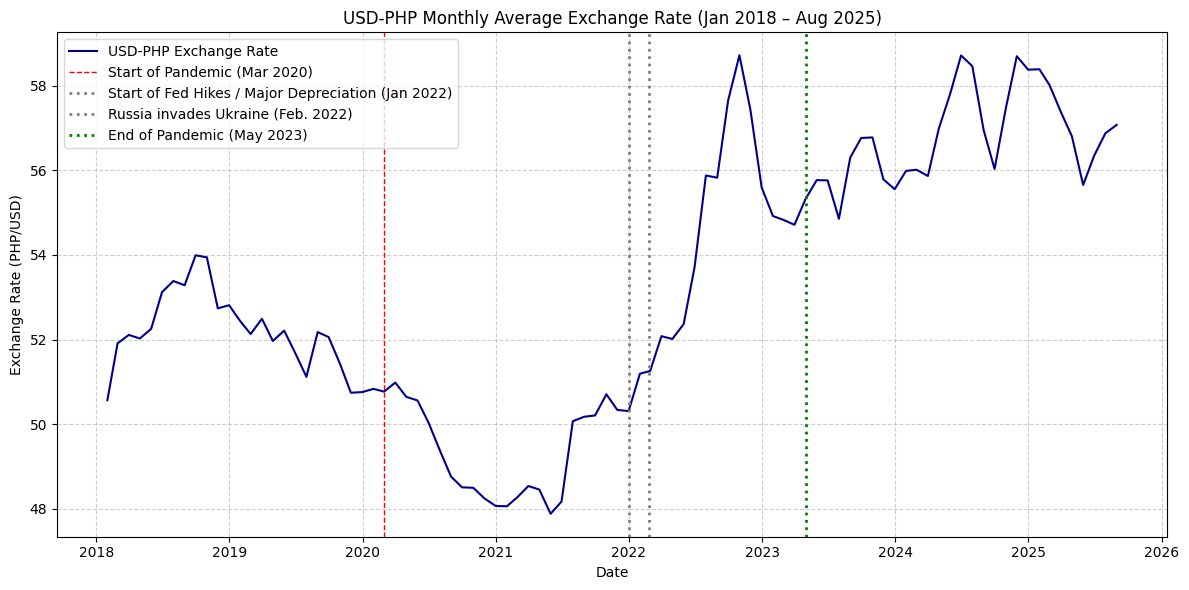

In [27]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=main_monthly.index, y=main_monthly["Price USD-PHP"], color='darkblue', label='USD-PHP Exchange Rate')

plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', linewidth=1, label='Start of Pandemic (Mar 2020)')
plt.axvline(pd.to_datetime('2022-01-01'), color='grey', linestyle=':', linewidth=2, label='Start of Fed Hikes / Major Depreciation (Jan 2022)')
plt.axvline(pd.to_datetime('2022-02-24'), color='grey', linestyle=':', linewidth=2, label='Russia invades Ukraine (Feb. 2022)')
plt.axvline(pd.to_datetime('2023-05-01'), color='green', linestyle=':', linewidth=2, label='End of Pandemic (May 2023)')

plt.title('USD-PHP Monthly Average Exchange Rate (Jan 2018 – Aug 2025)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (PHP/USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Interpretation

Between Q1 2020 and Q4 2021, the PHP exhibited notable strength, bottoming out near 48.00 PHP/USD. However, the onset of aggressive US Federal Reserve tightening in January 2022, compounded by heightened geopolitical risk from the Russia-Ukraine conflict, triggered a sharp reversal. By late 2022, the Peso reached historic lows near 59.00 PHP/USD. While a brief recovery followed in early 2023, the exchange rate has since stabilized within a volatile range of 54.00 to 58.00 PHP/USD, reflecting persistent inflationary pressures and a widened trade deficit.

### Checking for the oil prices

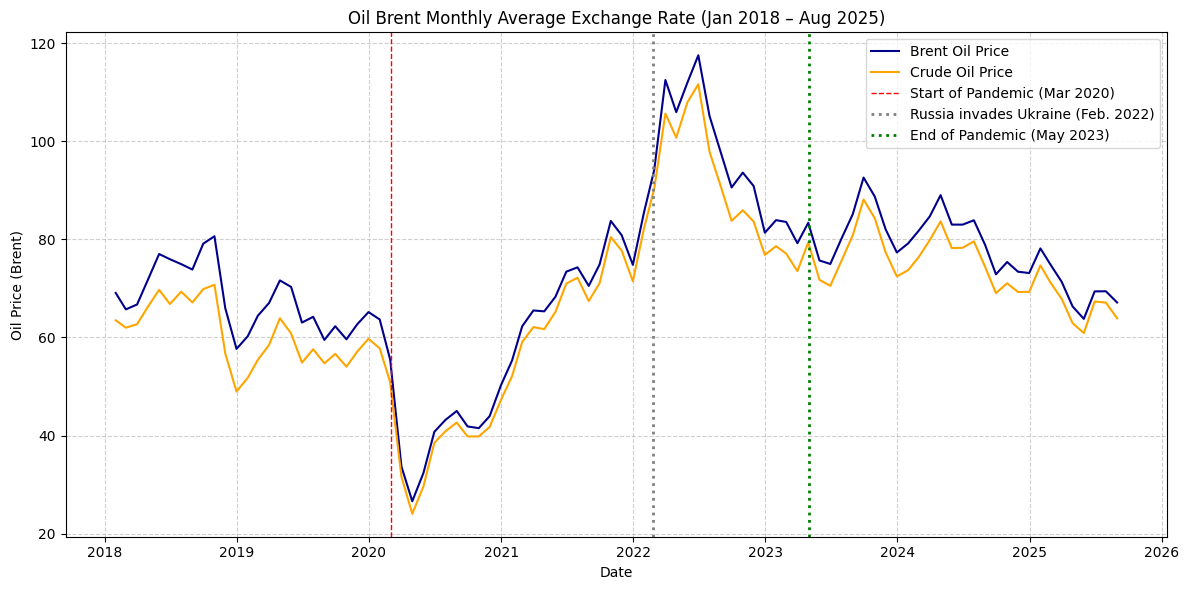

In [28]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=main_monthly.index, y=main_monthly["Price Brent"], color='darkblue', label='Brent Oil Price')
sns.lineplot(x=main_monthly.index, y=main_monthly["Price Crude"], color='orange', label='Crude Oil Price')


plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', linewidth=1, label='Start of Pandemic (Mar 2020)')
plt.axvline(pd.to_datetime('2022-02-24'), color='grey', linestyle=':', linewidth=2, label='Russia invades Ukraine (Feb. 2022)')
plt.axvline(pd.to_datetime('2023-05-01'), color='green', linestyle=':', linewidth=2, label='End of Pandemic (May 2023)')

plt.title('Oil Brent Monthly Average Exchange Rate (Jan 2018 – Aug 2025)')
plt.xlabel('Date')
plt.ylabel('Oil Price (Brent)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Interpretation

Oil crash during the onset of the Pandemic in 2020, we can observe that as the oil prices suddenly dips. On the other hand, it does rise up eventually, but then during the Russian-Ukraine war, the oil prices spike between the beggining of the war, marking the highest oil price days.

### Interest Rates USA and Philippines

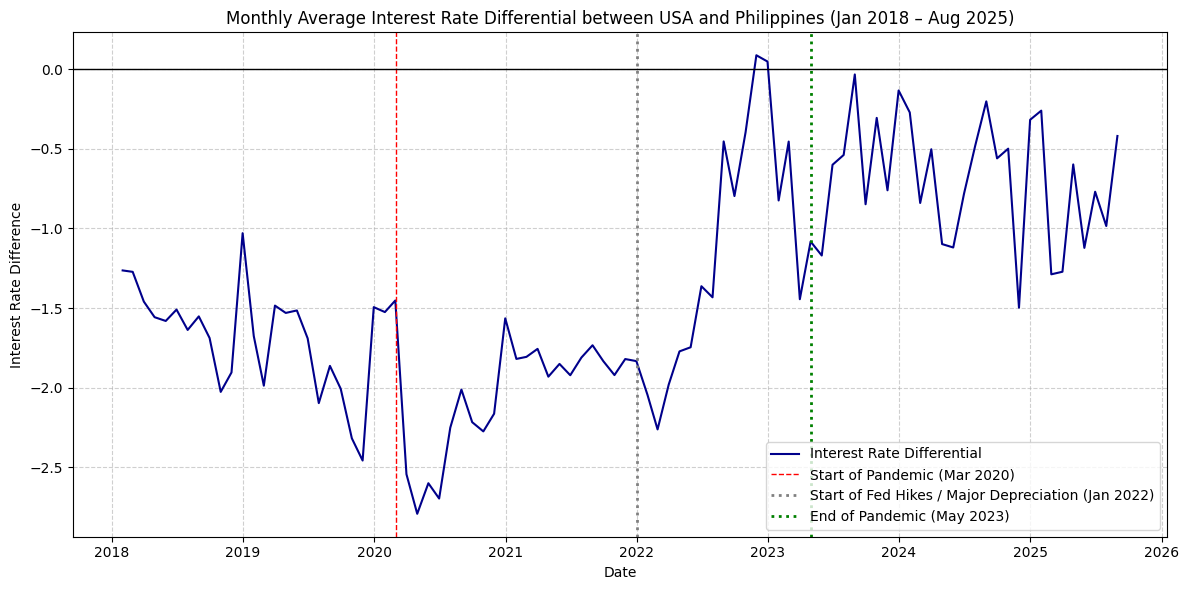

In [29]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=main_monthly.index, y=main_monthly["Interest_Diff"], color='darkblue', label='Interest Rate Differential')


plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', linewidth=1, label='Start of Pandemic (Mar 2020)')
plt.axvline(pd.to_datetime('2022-01-01'), color='grey', linestyle=':', linewidth=2, label='Start of Fed Hikes / Major Depreciation (Jan 2022)')
plt.axvline(pd.to_datetime('2023-05-01'), color='green', linestyle=':', linewidth=2, label='End of Pandemic (May 2023)')

plt.title('Monthly Average Interest Rate Differential between USA and Philippines (Jan 2018 – Aug 2025)')
plt.xlabel('Date')
plt.ylabel('Interest Rate Difference')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Interpretation

Throughout 2018–2025, the interest rate differential (US minus PH) remained negative, indicating consistently higher Philippine policy rates compared to US rates.

However, during 2022–2023, the differential narrowed significantly due to the aggressive US Federal Reserve rate hikes. This reduced negative differential corresponds with a notable period of PHP depreciation, suggesting that shrinking interest rate gaps contributed to capital shifts toward USD-denominated assets

### Inflation Rates

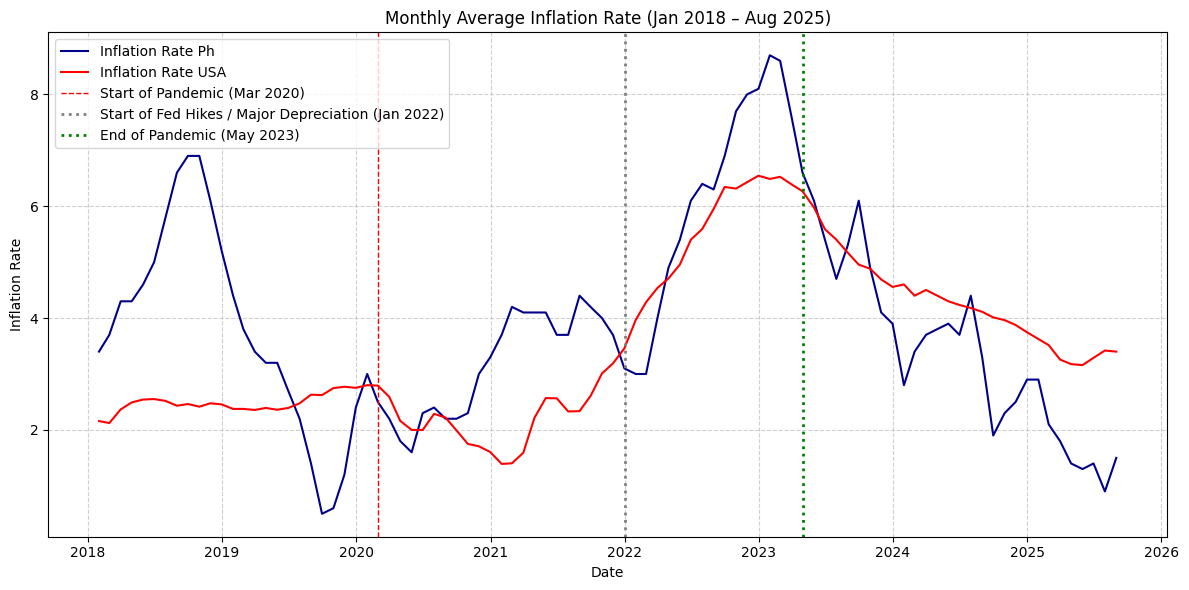

In [30]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=main_monthly.index, y=main_monthly["Inflation Rate Ph"], color='darkblue', label='Inflation Rate Ph')
sns.lineplot(x=main_monthly.index, y=main_monthly["Inflation Rate US"], color='red', label='Inflation Rate USA')


plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', linewidth=1, label='Start of Pandemic (Mar 2020)')
plt.axvline(pd.to_datetime('2022-01-01'), color='grey', linestyle=':', linewidth=2, label='Start of Fed Hikes / Major Depreciation (Jan 2022)')
plt.axvline(pd.to_datetime('2023-05-01'), color='green', linestyle=':', linewidth=2, label='End of Pandemic (May 2023)')

plt.title('Monthly Average Inflation Rate (Jan 2018 – Aug 2025)')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Interpretation:

The graph shows PH inflation as **more volatile**, peaking significantly higher ($\approx$ 8.7%) in 2023 following global shocks, compared to the USA's peak ($\approx$ 6.5%). Although the US Fed hiked aggressively in 2022–2023, the PH's even higher domestic inflation rates created a negative real interest rate differential, which strongly correlated with the **PHP's major depreciation** during that period. Following the peak, PH inflation has sharply declined and is projected to stabilize near 2% by 2025, while the USA's inflation is projected to remain **stickier and higher** ($\approx$ 3.5%), indicating persistent price challenges in the US economy.



### Monthly Average OFW Remittance

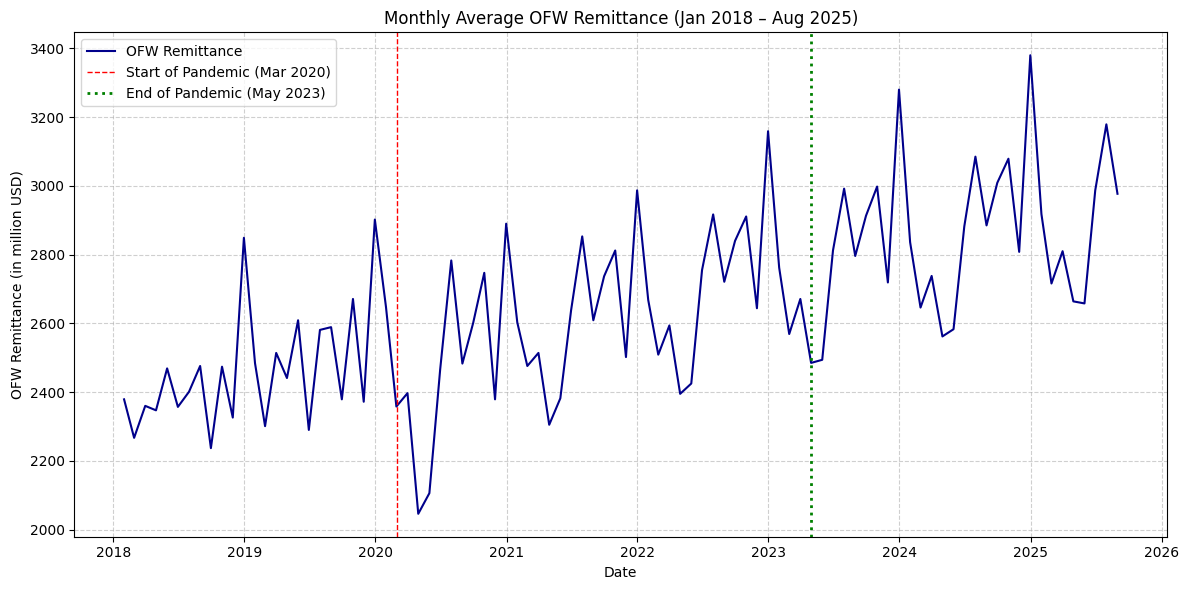

In [31]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=main_monthly.index, y=main_monthly["Remittance (in million USD)"], color='darkblue', label='OFW Remittance')


plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', linewidth=1, label='Start of Pandemic (Mar 2020)')
plt.axvline(pd.to_datetime('2023-05-01'), color='green', linestyle=':', linewidth=2, label='End of Pandemic (May 2023)')

plt.title('Monthly Average OFW Remittance (Jan 2018 – Aug 2025)')
plt.xlabel('Date')
plt.ylabel('OFW Remittance (in million USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend() 
plt.tight_layout()
plt.show()


### Interpretation:

The graph shows Monthly Average OFW Remittances with a strong, predictable annual seasonality (peaks near Christmas). The overall trend from 2018 to 2025 is clearly upward, with remittance baseline and peaks steadily increasing, demonstrating the growing importance of this foreign exchange source. The COVID-19 pandemic (Mar 2020) caused only a brief, sharp dip, after which remittances quickly recovered and showed remarkable resilience, surpassing previous peaks by late 2020. Projections show this strong upward trajectory continuing, with monthly peaks reaching new highs (nearly $3,400 million) in 2024–2025.

### Philippine Exports and Imports

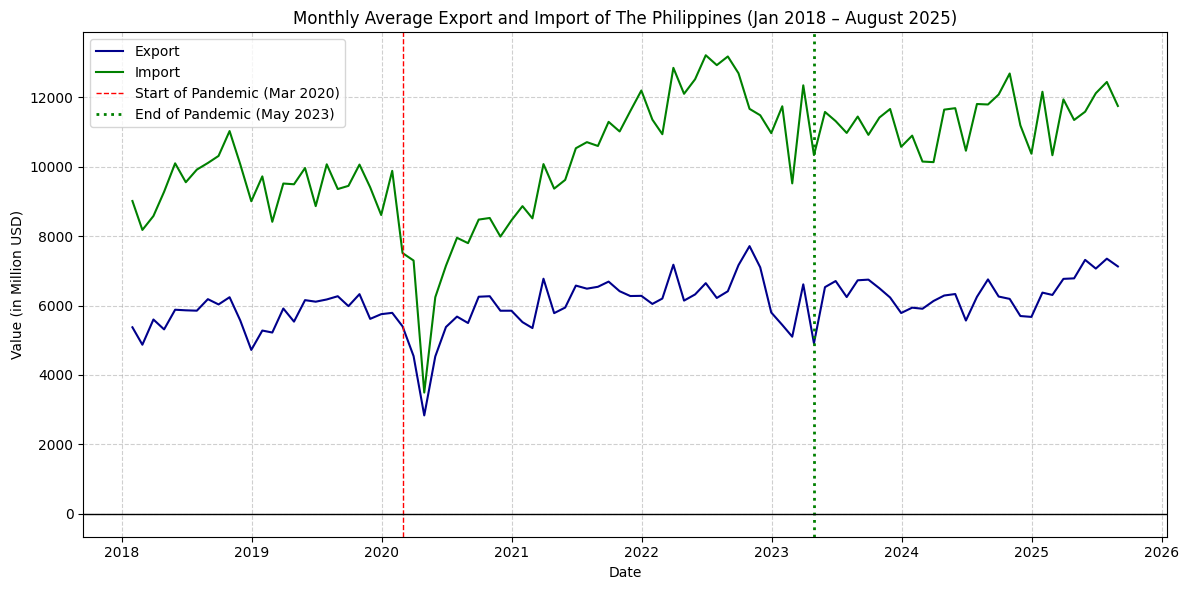

In [32]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=main_monthly.index, y=main_monthly["exportsPh value"], color='darkblue', label='Export')
sns.lineplot(x=main_monthly.index, y=main_monthly["importsPh value"], color='green', label='Import')

plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', linewidth=1, label='Start of Pandemic (Mar 2020)')
plt.axvline(pd.to_datetime('2023-05-01'), color='green', linestyle=':', linewidth=2, label='End of Pandemic (May 2023)')

plt.title('Monthly Average Export and Import of The Philippines (Jan 2018 – August 2025)')
plt.xlabel('Date')
plt.ylabel('Value (in Million USD)')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Interpretation: 

The graph shows a **persistent and substantial trade deficit** for the Philippines, as **Imports (green line) consistently and significantly outweigh Exports (blue line)**. The **2020 pandemic** caused a sharp, simultaneous collapse in both, followed by a **V-shaped recovery**. Post-pandemic (2022-2023), a **surge in imports** led to the **widest trade deficit** on the chart. Projections for 2024-2025 show the trade deficit stabilizing but remaining large, with imports staying well above $11,000M and exports staying below $7,500M.



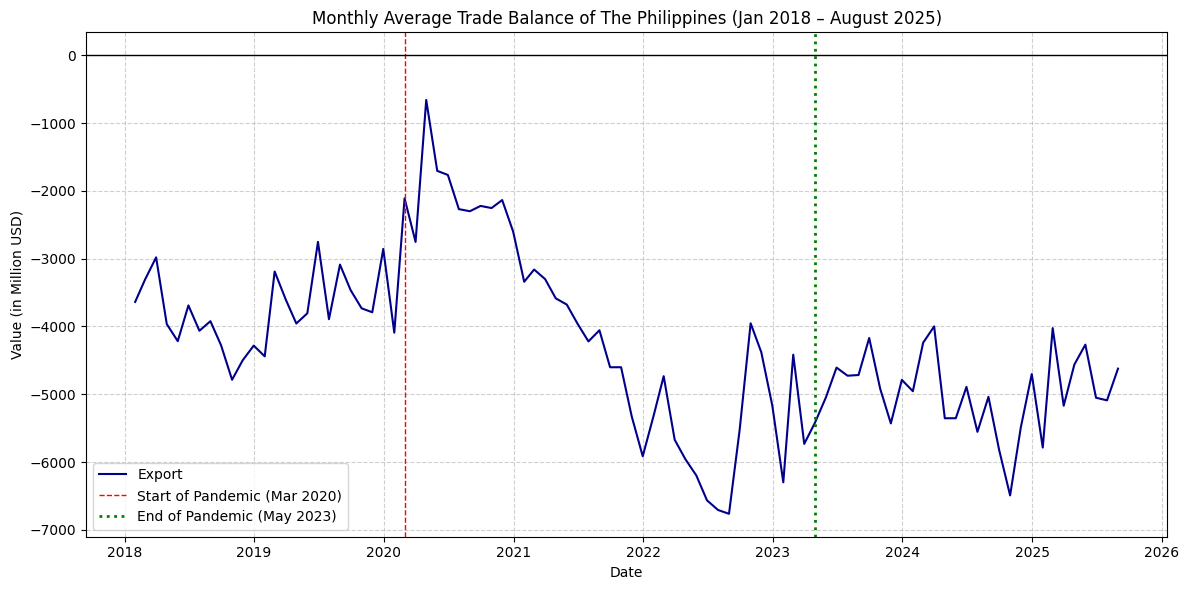

In [33]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=main_monthly.index, y=main_monthly["Trade Balance"], color='darkblue', label='Export')

plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', linewidth=1, label='Start of Pandemic (Mar 2020)')
plt.axvline(pd.to_datetime('2023-05-01'), color='green', linestyle=':', linewidth=2, label='End of Pandemic (May 2023)')

plt.title('Monthly Average Trade Balance of The Philippines (Jan 2018 – August 2025)')
plt.xlabel('Date')
plt.ylabel('Value (in Million USD)')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


## Interpretation (2018–2025)

The chart shows that the Philippines maintained a **consistent trade deficit** (Exports < Imports) throughout the entire period, meaning the balance is always below zero.

* **Pre-Pandemic (2018 - Early 2020):** Deficits fluctuated between \$-3000 million and \$-4500 million.
* **Pandemic Start (Mar 2020):** The deficit **sharply narrowed** to near \$-1000 million, likely due to a sudden drop in import demand/economic activity.
* **Pandemic Recovery & Peak Deficit (2021 - Early 2023):** The deficit began to widen dramatically, reaching its **worst point** near \$-6800 million in 2022/2023, indicating import growth significantly outpaced exports.
* **Post-Pandemic (Late 2023 - 2025):** The deficit **moderately improved** from the low point but remains substantial and volatile, generally fluctuating between \$-4000 million and \$-6000 million.

The key story is the initial sharp pandemic-related improvement followed by the record widening of the deficit in the subsequent recovery phase.


# Daily volatility change from pre-pandemic (2018–2019) vs. pandemic/post-pandemic (2020–2025)

In [34]:
# Calculate the log returns and rolling volatility in exchangeRate

exchangeRate['Log_Return'] = np.log(exchangeRate['Price USD-PHP'] / exchangeRate['Price USD-PHP'].shift(1))
window = 20
exchangeRate['Rolling_Volatility'] = exchangeRate['Log_Return'].rolling(window=window).std() * np.sqrt(252)



pre_pandemic_vol = exchangeRate.loc['2018':'2019', 'Rolling_Volatility'].mean()
pandemic_vol = exchangeRate.loc['2020':'2025', 'Rolling_Volatility'].mean()

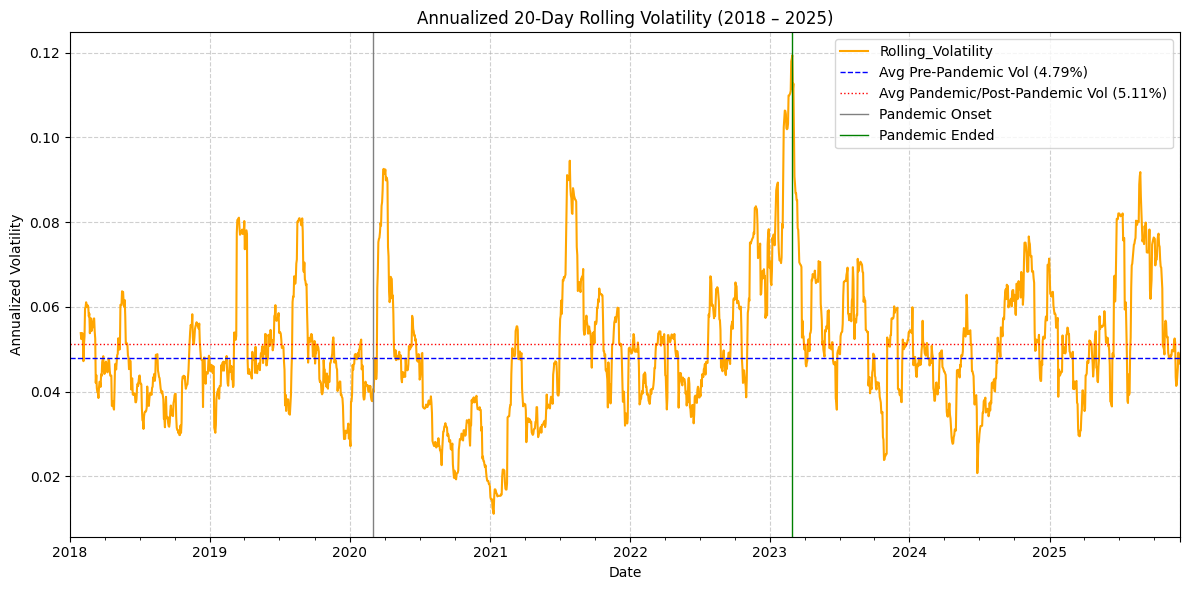

In [35]:
plt.figure(figsize=(12, 6))
exchangeRate['Rolling_Volatility'].plot(title='Annualized 20-Day Rolling Volatility (2018 – 2025)', 
                                        color='orange')

plt.axhline(pre_pandemic_vol, color='blue', linestyle='--', linewidth=1, 
            label=f'Avg Pre-Pandemic Vol ({pre_pandemic_vol * 100:.2f}%)')
plt.axhline(pandemic_vol, color='red', linestyle=':', linewidth=1, 
            label=f'Avg Pandemic/Post-Pandemic Vol ({pandemic_vol * 100:.2f}%)')

plt.axvline(pd.to_datetime('2020-03-01'), color='gray', linestyle='-', linewidth=1, 
            label='Pandemic Onset')

plt.axvline(pd.to_datetime('2023-03-01'), color='green', linestyle='-', linewidth=1, 
            label='Pandemic Ended')
    
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation

The annualized 20-day rolling volatility demonstrates that the market has experienced increased overall instability since the start of the pandemic (Avg Vol rose from $4.79\%$ to $5.11\%$). The initial pandemic shock did not produce the highest volatility spike; instead, the largest peak (over 12%) occurred around May 2023, coinciding with the official end of the pandemic. The most recent period (2024–2025) shows continued, though slightly elevated, volatility relative to the pre-pandemic norm.

In [36]:
# Ensure datetime index
exchangeRate.index = pd.to_datetime(exchangeRate.index)

# Monthly average of rolling volatility
vol_monthly = exchangeRate['Rolling_Volatility'].resample('M').mean()

heat_data = np.array([vol_monthly.values])
plt.figure(figsize=(14, 2))


# X-axis ticks: yearly labels
years = vol_monthly.index.year
unique_years = np.unique(years)
year_positions = [np.where(years == y)[0][0] for y in unique_years]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_896\1052084786.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vol_monthly = exchangeRate['Rolling_Volatility'].resample('M').mean()


<Figure size 1400x200 with 0 Axes>

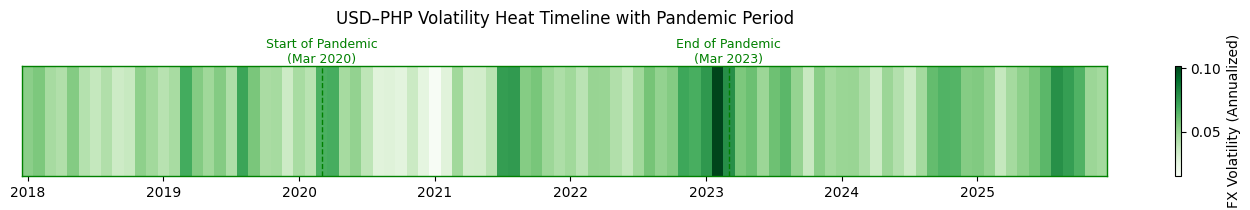

In [ ]:
fig, ax = plt.subplots(figsize=(14, 2.2))
pandemic_start = vol_monthly.index.get_loc('2020-03-31')
pandemic_end = vol_monthly.index.get_loc('2023-03-31')
# Heat timeline
im = ax.imshow(
    heat_data,
    aspect='auto',
    cmap='Greens'
)

# ---- Pandemic boundaries (green, not black) ----
ax.axvline(pandemic_start, color='green', linestyle='--', linewidth=1)
ax.axvline(pandemic_end, color='green', linestyle='--', linewidth=1)

# ---- Outside-the-box labels at y = 1 ----
ax.text(
    pandemic_start, 1,
    'Start of Pandemic\n(Mar 2020)',
    ha='center', va='bottom',
    fontsize=9,
    color='green',
    transform=ax.get_xaxis_transform()
)

ax.text(
    pandemic_end, 1,
    'End of Pandemic\n(Mar 2023)',
    ha='center', va='bottom',
    fontsize=9,
    color='green',
    transform=ax.get_xaxis_transform()
)

# ---- Green outline around heat timeline ----
for spine in ax.spines.values():
    spine.set_edgecolor('green')
    spine.set_linewidth(1)

# Axis formatting
ax.set_xticks(year_positions)
ax.set_xticklabels(unique_years)
ax.set_yticks([])

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('FX Volatility (Annualized)')

ax.set_title(
    'USD–PHP Volatility Heat Timeline with Pandemic Period',
    pad=30
)

plt.tight_layout()

# ---- Save as transparent PNG ----
# plt.savefig(
#    'usd_php_volatility_heat_timeline.png',
#    dpi=300,
#    bbox_inches='tight',
#    transparent=True
# )

plt.show()

The Philippine Peso (PHP) exhibited pronounced volatility from 2018 to 2025, as reflected in the green-shaded FX timeline. Darker green shades correspond to periods of higher month-to-month exchange rate swings, while lighter green indicates calmer, more stable periods. From 2018 to 2019, the Peso remained relatively stable, with light to medium shades signaling a low-volatility environment. In mid-2021, volatility surged sharply, marking the first major peak of the period, likely driven by domestic inflationary pressures and heightened global uncertainty during the pandemic recovery phase. After this initial peak, volatility eased somewhat but remained above pre-2020 levels, reflecting lingering economic uncertainty. Toward the end of 2022, the Peso experienced a second, more intense spike in volatility, coinciding with aggressive U.S. Federal Reserve interest rate hikes and surges in global inflation. Just before the end of the pandemic period in May 2023, volatility reached an extreme rate of 0.1, reflecting a combination of residual pandemic effects, trade imbalances, and speculative FX activity. In 2024, volatility moderated but began to rise slightly toward year-end, indicating renewed external and domestic FX pressures, highlighting the Peso’s continued sensitivity to both global shocks and structural economic factors.

# USD–PHP show seasonal patterns during the pandemic period (2020–2025)

<Figure size 1200x1000 with 0 Axes>

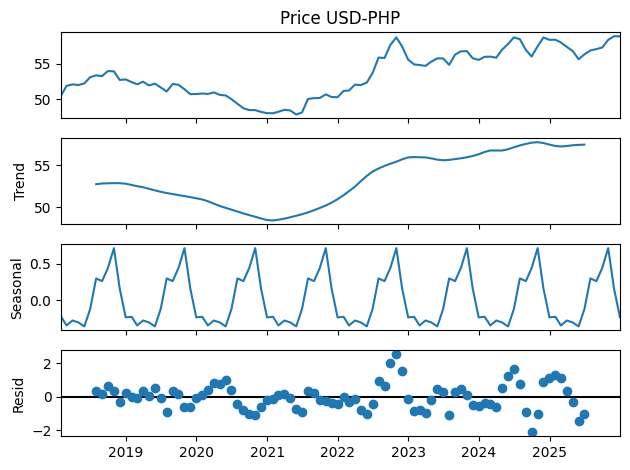

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

monthly_avg = exchangeRate['Price USD-PHP'].resample('ME').mean()

decomposition = seasonal_decompose(monthly_avg, model='additive')

plt.figure(figsize=(12, 10))
decomposition.plot()
plt.tight_layout()
plt.show()

### Interpretation

The USD-PHP exchange rate decomposition highlights a dominant long-term trend of Peso weakening from 2021 onward, alongside a consistent annual seasonal pattern. The years 2023 and 2024 exhibited high residual volatility, pointing to significant short-term market shocks.

# II. Bivariate

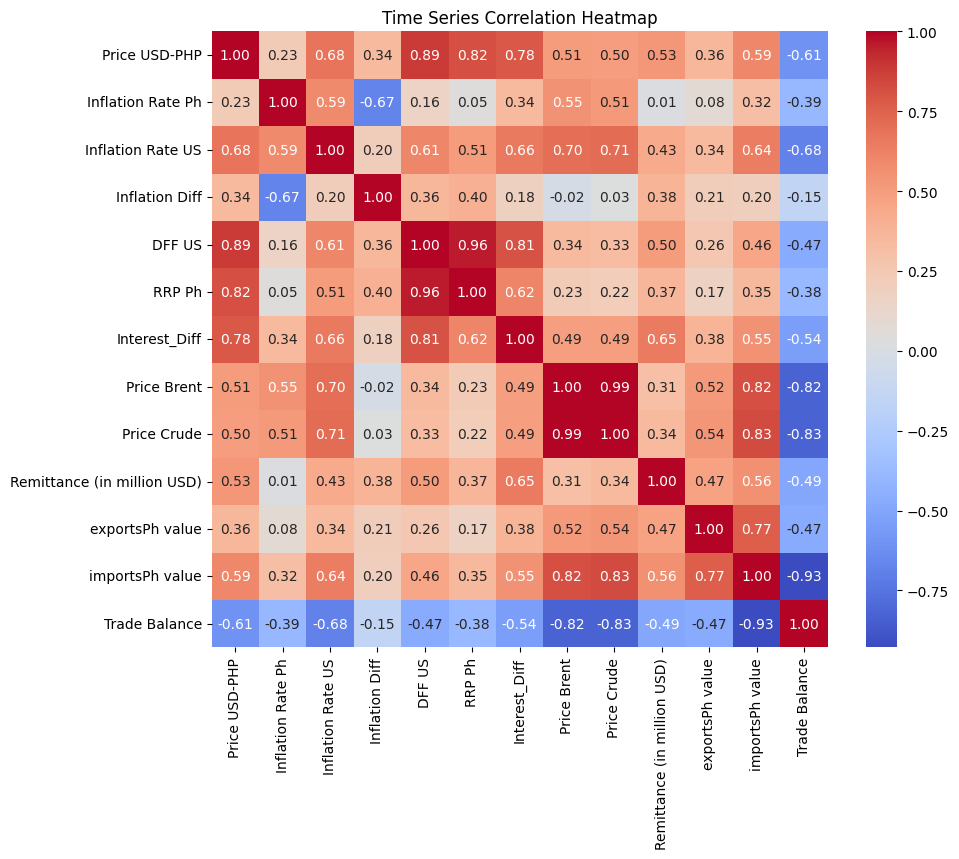

In [39]:
# Correlation heat map

columns = ["Price USD-PHP", "Inflation Rate Ph", "Inflation Rate US", "Inflation Diff",
           "DFF US", "RRP Ph", "Interest_Diff","Price Brent", "Price Crude", 
           "Remittance (in million USD)", "exportsPh value", "importsPh value",
           "Trade Balance"]

corr_matrix = main_monthly[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Time Series Correlation Heatmap')
plt.show()

### Interpretation

DFF USA and RRP PH show strong multicollinearity because both central banks react to the same global economic conditions, especially US monetary policy, inflation cycles, and global financial shocks. 

### Scatter Plot with Regression Line IRD vs USD-PHP Exchange Rate

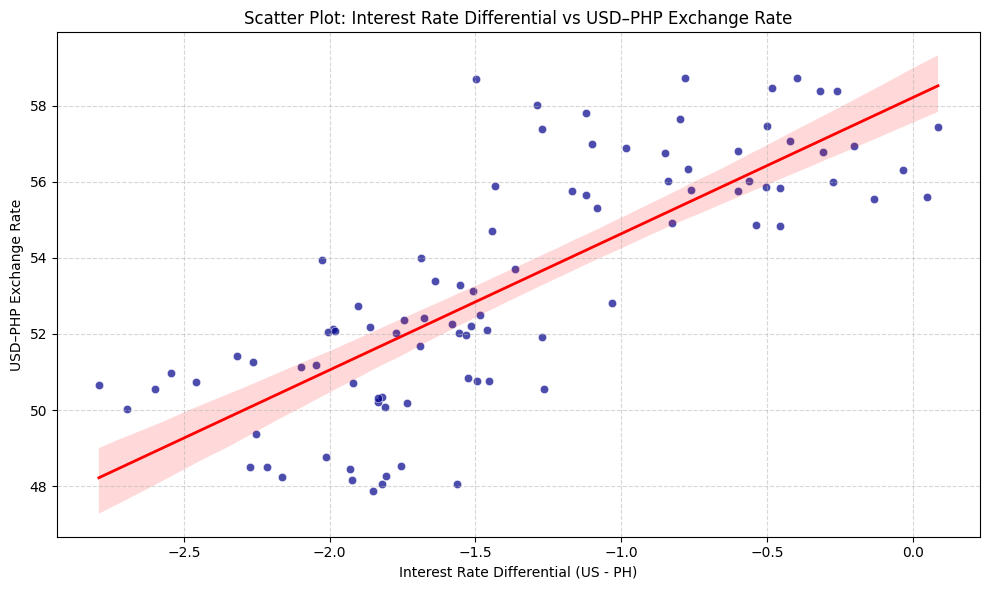

In [40]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=main_monthly["Interest_Diff"],
    y=main_monthly["Price USD-PHP"],
    color="darkblue",
    alpha=0.7
)

sns.regplot(
    x=main_monthly["Interest_Diff"],
    y=main_monthly["Price USD-PHP"],
    scatter=False,
    color="red",
    line_kws={'linewidth': 2}
)

plt.title("Scatter Plot: Interest Rate Differential vs USD–PHP Exchange Rate")
plt.xlabel("Interest Rate Differential (US - PH)")
plt.ylabel("USD–PHP Exchange Rate")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Brief Summary of USD-PHP Interest Rate Differential vs. Exchange Rate

The scatter plot shows a clear **positive correlation** between the **Interest Rate Differential (US - PH)** and the **USD-PHP Exchange Rate**.

* **Interpretation:** When the US interest rate is **relatively higher** than the Philippine rate (differential moves right/less negative), the **Peso weakens** (USD-PHP rate rises).
* **In simpler terms:** Higher US interest rates compared to the Philippines are associated with a **weaker Philippine Peso**.



# Multivariate

In [41]:
main_monthly["Remittance_PctChange"] = main_monthly["Remittance (in million USD)"].pct_change()

### Processing the Lagged Data

In [42]:
cols = [
    "Price USD-PHP",          # exchange rate level
    "Interest_Diff",
    "Inflation Diff",
    "Trade Balance",
    "Remittance_PctChange"
]

In [43]:
lagged_data = main_monthly[cols].dropna()

# Inflation diff lag: 1-6 months
for lag in range(1,7):
    lagged_data[f"Inflation Diff_lag{lag}"] = lagged_data["Inflation Diff"].shift(lag)

# Interest diff lag: 1-3 months
for lag in [1,2,3]:
    lagged_data[f"Interest_Diff_lag{lag}"] = lagged_data["Interest_Diff"].shift(lag)

# Remittance % change lag: 1-2 months
for lag in [1,2]:
    lagged_data[f"Remittance_PctChange_lag{lag}"] = lagged_data["Remittance_PctChange"].shift(lag)

# Trade balance: 1-3 months
for lag in [1, 2, 3]:
    lagged_data[f"Trade Balance{lag}"] = lagged_data["Trade Balance"].shift(lag)

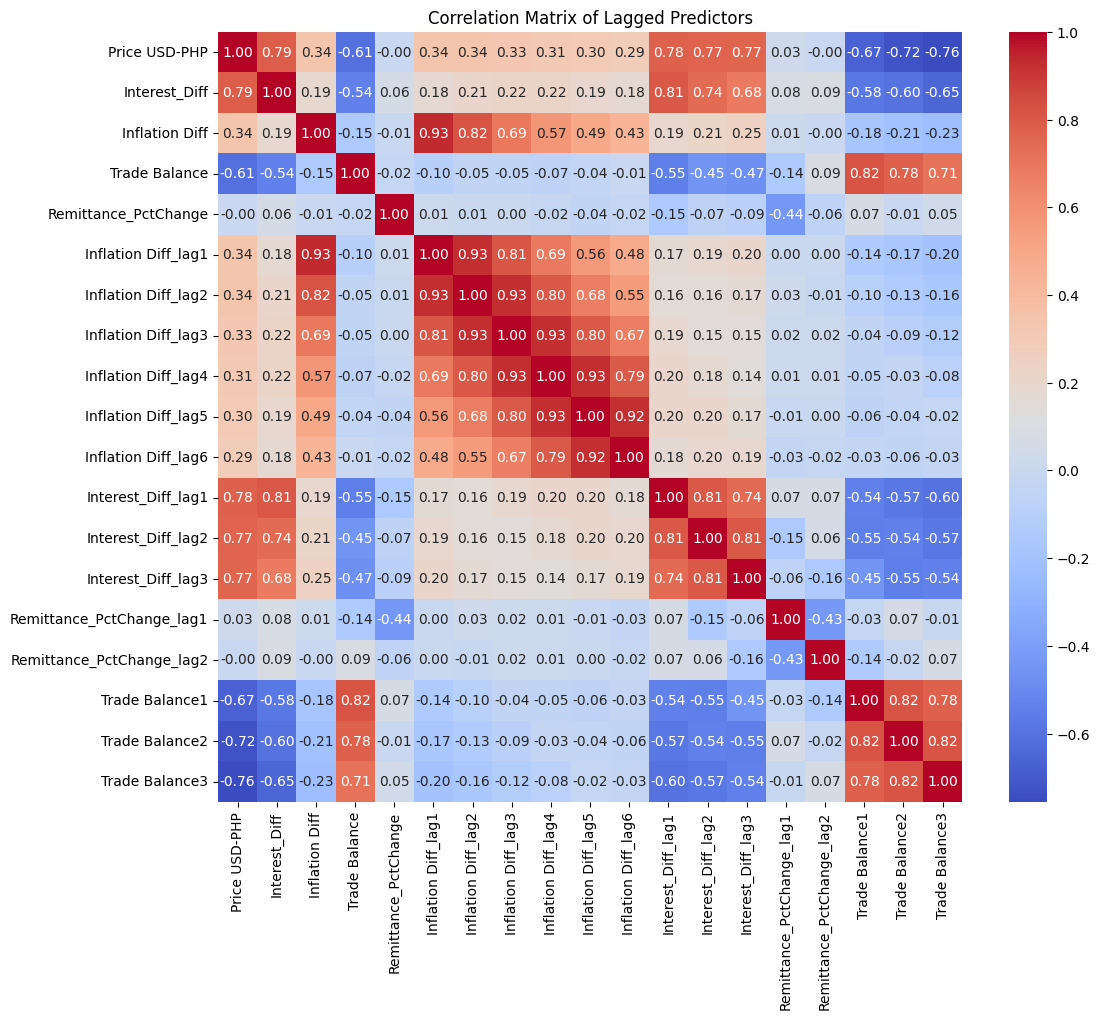

In [44]:
corr_matrix = lagged_data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Lagged Predictors")
plt.show()

### Interpretation of Correlation Matrix

This matrix identifies the strongest predictors of the **Price USD-PHP Exchange Rate** (first row):

1. **Interest Rate Differential (US - PH):** Shows a **strong positive correlation** (0.79 to 0.68 for lags 0 to 3), meaning higher US rates relative to PH rates are consistently associated with a **weaker Peso**.
2. **Trade Balance:** Shows a **strong negative correlation** (current: -0.61; lag 3: **-0.76**), meaning a better Trade Balance (smaller deficit) is associated with a **stronger Peso**. The Trade Balance from **three months ago** is the **strongest overall predictor** shown (-0.76).
3. **Remittance Percentage Change:** This variable shows a **very weak** correlation (0.06) and is **not a significant predictor**.

The key takeaway is that both **interest rate differences** and the **Trade Balance (especially lagged)** are the dominant forces driving the USD-PHP exchange rate in this model.


### Diagnostics VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

columns_to_drop = ['Price USD-PHP', 'Interest_Diff', 'Inflation Diff', 'Trade Balance', 'Remittance_PctChange',
                   "Inflation Diff_lag4", "Inflation Diff_lag5", "Inflation Diff_lag2", "Interest_Diff_lag2",
                   "Interest_Diff_lag3", "Trade Balance2", "Trade Balance3"]

# Select only independent variables
X = lagged_data.drop(columns=columns_to_drop).dropna()

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                    Variable       VIF
0        Inflation Diff_lag1  3.078586
1        Inflation Diff_lag3  4.424949
2        Inflation Diff_lag6  2.145788
3         Interest_Diff_lag1  2.802129
4  Remittance_PctChange_lag1  1.268338
5  Remittance_PctChange_lag2  1.278783
6             Trade Balance1  2.727005


# OLS of Selected Lagged data

`Price USD-PHP`, `Inflation Diff_lag1`, `Inflation Diff_lag3`, `Inflation Diff_lag6`, `Interest_Diff_lag1`, `Remittance_PctChange_lag1`, `Remittance_PctChange_lag2`, `Trade Balance1`

In [46]:
import statsmodels.api as sm

ols = lagged_data[[
    "Price USD-PHP",
    "Inflation Diff_lag1",
    "Inflation Diff_lag3",
    "Inflation Diff_lag6",
    "Interest_Diff_lag1",
    "Remittance_PctChange_lag1",
    "Remittance_PctChange_lag2",
    "Trade Balance1"
    ]].dropna()

# Select variables
X = ols[[
    "Inflation Diff_lag1",
    "Inflation Diff_lag3",
    "Inflation Diff_lag6",
    "Interest_Diff_lag1",
    "Remittance_PctChange_lag1",
    "Remittance_PctChange_lag2",
    "Trade Balance1"
]]

Y = ols["Price USD-PHP"]

# Add constant for OLS intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(Y, X).fit()

# Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Price USD-PHP   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     34.12
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           3.94e-21
Time:                        15:11:08   Log-Likelihood:                -161.36
No. Observations:                  85   AIC:                             338.7
Df Residuals:                      77   BIC:                             358.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Interpretation

`Interest_Diff_lag1`: Coefficients = 2.47 | p < 0.001 <br>
When the interest rate differential increases by 1 unit, the PHP depreciates by ₱2.47 per USD (i.e., USD/PHP rises). This makes economic sense, if US interest rates rise, global funds tend to flow into US financial assets. Or if PH interest rates fall, PH becomes less attractive to investors. 

`Inflation Diff lags (lag1, lag3, lag6)` <br>: Coefficients ≈ 0.14–0.21 | All insignificant (p > 0.30)
These don’t have reliable predictive power in your sample. Still, the positive sign aligns with economic intuition: higher PH inflation relative to US weakens Peso.

`Remittance_PctChange_lag1 and lag2`: <br>
- Lag1: negative but insignificant
- Lag2: negative and significant (p = 0.043)

Remittance growth 2 months earlier tends to strengthen the PHP (push USD/PHP down). This makes sense because remittances increase FX supply.

`Trade Balance1 (lag)`: Coefficient = –0.0010, highly significant. <br>
A worsening trade balance (more deficit) weakens PHP and USD/PHP rises. The effect is small per unit because trade balance values are often large numbers. 

What weakens the peso (increases USD/PHP):
Higher interest rate differential (strongest effect)

What strengthens the peso (decreases USD/PHP):
Higher remittances (with a 2‑month lag)

Better trade balance

Inflation lags do not matter much in this setup.

BUT—

Your model suffers from:
Autocorrelation (DW = 0.716)

Multicollinearity (Condition number > 60,000)

# Ridge Regression

In [47]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ridge_set = lagged_data.dropna()

X = ridge_set.drop(columns=['Price USD-PHP'])

y = ridge_set["Price USD-PHP"]

tscv = TimeSeriesSplit(n_splits=5)

alphas = [0.1, 1, 5, 10, 50, 100]

ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=alphas, cv=tscv))
])

ridge_model.fit(X, y)

print("Best α:", ridge_model["ridge"].alpha_)

for name, coef in zip(X.columns, ridge_model["ridge"].coef_):
    print(name, coef)


Best α: 10.0
Interest_Diff 0.3108884195065292
Inflation Diff -0.07880959222737609
Trade Balance 0.17144659551268504
Remittance_PctChange 0.31662598863907643
Inflation Diff_lag1 0.11697514681253736
Inflation Diff_lag2 0.13814244776313753
Inflation Diff_lag3 0.11442137795981194
Inflation Diff_lag4 0.14077298772411243
Inflation Diff_lag5 0.1580236208931001
Inflation Diff_lag6 0.09513466548521504
Interest_Diff_lag1 0.3835118875841736
Interest_Diff_lag2 0.48530411670759377
Interest_Diff_lag3 0.7886609430772837
Remittance_PctChange_lag1 0.35219419329234275
Remittance_PctChange_lag2 0.1514719350206769
Trade Balance1 -0.2826396960736699
Trade Balance2 -0.47902484969760517
Trade Balance3 -0.736591931940964


### Interpretation

`Interest_Diff`: +0.311 <br>
`Interest_Diff_lag1`: +0.384 <br>
`Interest_Diff_lag2`: +0.485 <br>
`Interest_Diff_lag3`: +0.789 <br>

Higher US–PH interest rate differentials cause the peso to weaken (USD–PHP rises), not only immediately but increasingly over the next 3 months. This is exactly what monetary theory predicts, if US rates increase relative to PH, the capital flows to the US, and peso depreciates. The effect strengthens over time because interest rate changes take time to influence global capital flows.

`Inflation Diff`: -0.079 (slightly negative) <br>
`Inflation Diff_lag1`: +0.117 <br>
`Inflation Diff_lag2`: +0.138 <br>
`Inflation Diff_lag3`: +0.114 <br>
`Inflation Diff_lag4`: +0.141 <br>
`Inflation Diff_lag5`: +0.158 <br>
`Inflation Diff_lag6`: +0.095 <br>

Immediate inflation effect is weak or slightly negative, likely due to noise. After 1–6 months, higher PH inflation relative to US inflation leads to peso depreciation (USD–PHP goes up). This aligns with Purchasing Power Parity (PPP) that if PH prices rise faster than US prices → peso loses purchasing power, peso depreciates, and the persistence (lags up to 6 months) shows that Inflation shocks affect the exchange rate slowly but steadily.

`Trade Balance`: +0.171 (current) <br>
`Trade Balance1`: –0.283 <br>
`Trade Balance2`: –0.479 <br>
`Trade Balance3`: –0.737 <br>

A more negative (worse) trade balance today → peso weakens (USD–PHP up). The effect strengthens dramatically over the next 3 months. Trade deficits mean the Philippines must buy more USD to pay for imports. This creates Persistent FX demand → peso depreciation pressure. The increasing negative magnitude from lag1 to lag3 shows Trade shocks (like oil price spikes or supply chain disruptions) influence the exchange rate with a delay.


`Remittance_PctChange`: +0.317 (current) <br>
`Remittance_PctChange_lag1`: +0.352 <br>
`Remittance_PctChange_lag2`: +0.151 <br>

These positive coefficients mean something counterintuitive at first (remittances ↑ should strengthen peso ↓ USD–PHP). But Ridge shrinks coefficients heavily, and the relationship may be tangled with other variables.

Economic interpretation that still aligns with theory remittances provide FX inflows → support peso → usually peso appreciates. But in your data, remittances may rise during crises (OFW emergency remittances), which coincide with peso depreciation periods (COVID, oil shocks). So the model likely picks up co-movements, not pure causality. Remittances matter, but the effect is small and mixed due to crisis periods.

**Overall**:

The Ridge regression shows that the US–PH interest rate differential is the most influential driver of USD–PHP movements, with positive and increasing impacts across multiple lags. Higher US rates relative to PH consistently lead to peso depreciation, reflecting delayed capital flow adjustments. Inflation differentials also contribute to peso weakening, in line with purchasing power parity, with effects materializing gradually over 1–6 months. Trade balance deficits exert strong depreciation pressure with a 1–3 month lag, consistent with foreign currency demand to finance imports. Remittances show weaker and mixed effects, likely because remittance surges often coincide with crisis periods when the peso is already depreciating.

# Change Point Detection

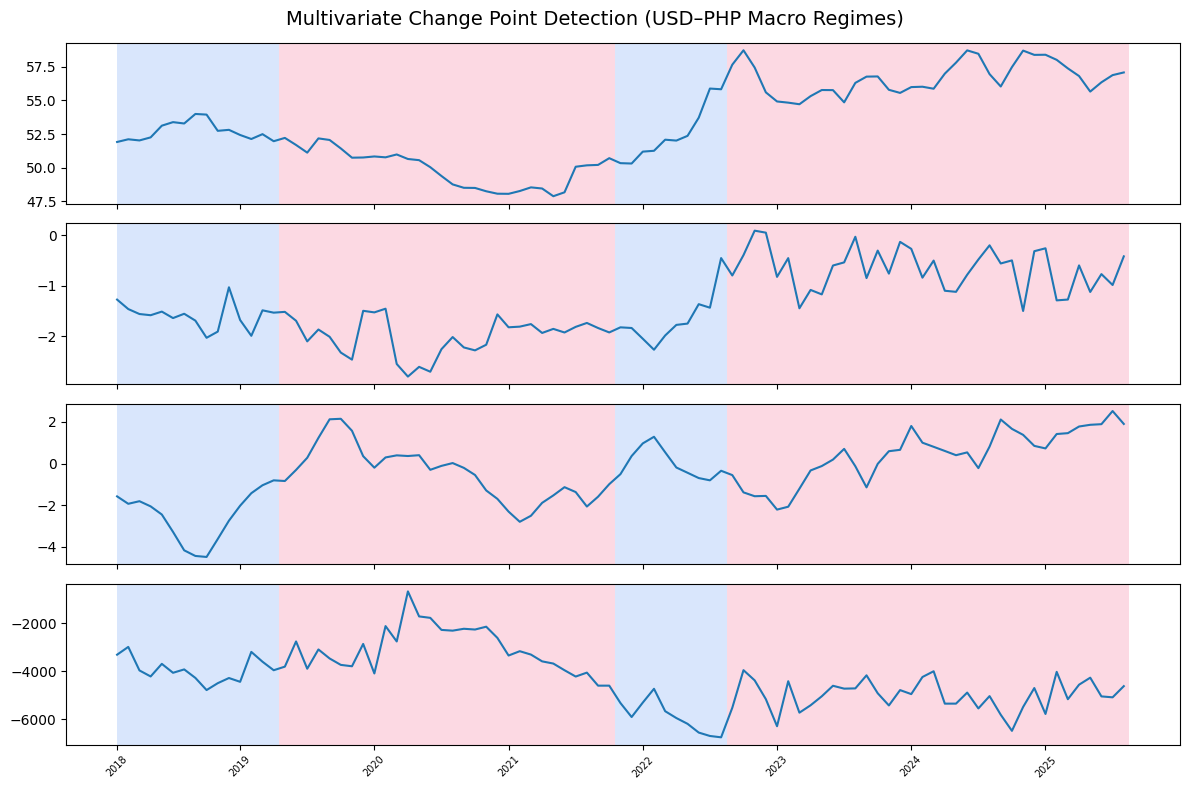

In [48]:
import matplotlib.dates as mdates
import ruptures as rpt

cpd_cols = ['Price USD-PHP', 'Interest_Diff', 'Inflation Diff', 'Trade Balance']

# Perform CPD
X = lagged_data[cpd_cols].dropna()
model = rpt.Binseg(model="rbf").fit(X)
breakpoints = model.predict(n_bkps=3)

signal = X.values
n_samples = signal.shape[0]
date_index = X.index


# CPD display
fig, axarr = rpt.display(X.values, breakpoints, figsize=(12, 8))
plt.suptitle("Multivariate Change Point Detection (USD–PHP Macro Regimes)", fontsize=14)

# Ensure axarr is iterable
axes = axarr if isinstance(axarr, (list, np.ndarray)) else [axarr]

years = np.unique(X.index.year)
year_positions = [np.where(X.index.year == y)[0][0] for y in years]

for ax in axes:
    ax.set_xticks(year_positions)
    ax.set_xticklabels(years, rotation=45, fontsize=7)

plt.tight_layout()
plt.show()


### Interpretation

The Multivariate Change Point Detection analysis identifies three distinct macroeconomic regimes for the USD-PHP exchange rate and related factors (interest rates, inflation, trade balance) between 2018 and 2025:

* **Regime 1 (2018 – Early 2020):** Characterized by a stable Peso, high Philippine interest rates relative to the US (large negative differential), and a moderate trade deficit.
* **Regime 2 (Early 2020 – Mid-2022):** Characterized by a stable to slightly strengthening Peso, a narrowing interest rate differential, and volatile trade balance swings (initial improvement followed by a sharp widening).
* **Regime 3 (Mid-2022 – 2025):** The current regime is marked by a **rapidly weakening Peso** (USD-PHP rising to the 55-57 range), a **minimal interest rate differential** (US rates closing the gap), and a **sustained, wide trade deficit**.

The most significant change point occurred in **mid-2022**, defining the current environment of high USD-PHP rates.


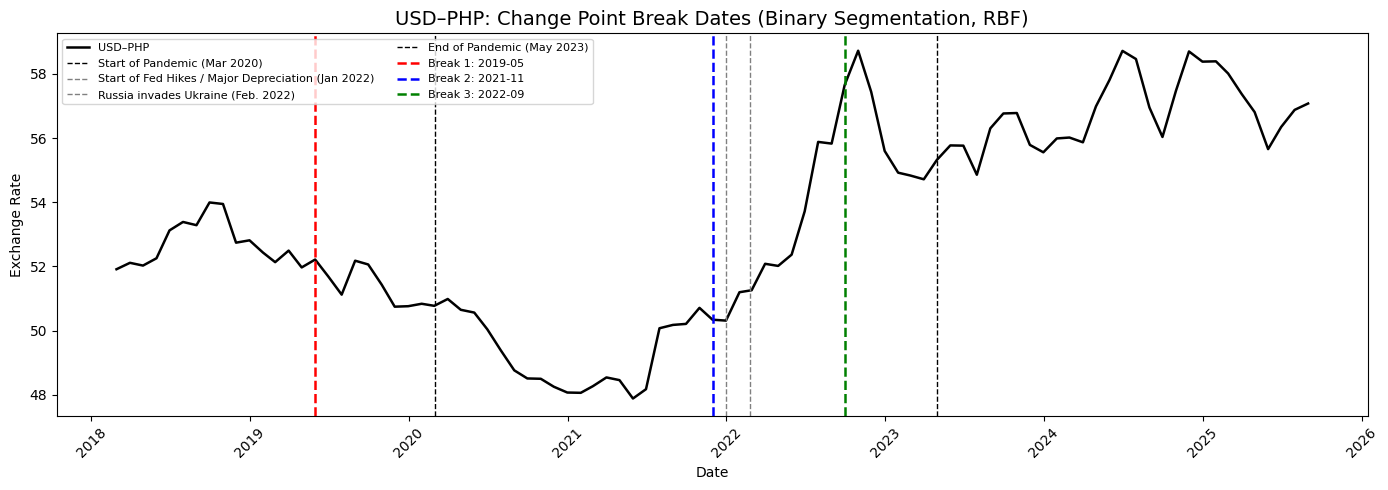

In [49]:
# --- Use the breakpoints you already computed ---
break_idxs = breakpoints[:-1]  # drop final endpoint (ruptures adds n)
dates = X.index

# --- Create figure ---
plt.figure(figsize=(14, 5))
plt.plot(dates, X["Price USD-PHP"], color="black", linewidth=1.8, label="USD–PHP")

plt.axvline(pd.to_datetime('2020-03-01'), color='black', linestyle='--', linewidth=1, label='Start of Pandemic (Mar 2020)')
plt.axvline(pd.to_datetime('2022-01-01'), color='grey', linestyle='--', linewidth=1, label='Start of Fed Hikes / Major Depreciation (Jan 2022)')
plt.axvline(pd.to_datetime('2022-02-24'), color='grey', linestyle='--', linewidth=1, label='Russia invades Ukraine (Feb. 2022)')
plt.axvline(pd.to_datetime('2023-05-01'), color='black', linestyle='--', linewidth=1, label='End of Pandemic (May 2023)')

# --- Define custom colors for break lines ---
colors = ["red", "blue", "green", "purple", "orange", "brown"]

for i, bp in enumerate(break_idxs):
    bp_date = dates[bp]

    plt.axvline(
        bp_date,
        color=colors[i % len(colors)],
        linestyle="--",
        linewidth=1.8,
        label=f"Break {i+1}: {bp_date.strftime('%Y-%m')}"
    )

# --- Formatting ---
plt.title("USD–PHP: Change Point Break Dates (Binary Segmentation, RBF)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Exchange Rate")

plt.legend(fontsize=8, ncol=2)

# Improve x-axis date formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretation

The analysis identifies a **major regime shift in mid-2022**, leading to a **rapid and sustained weakening of the Philippine Peso** (USD-PHP rising to the 56-58 range). This depreciation is driven by a **rising Interest Rate Differential** favoring the US and a **persistent, wide Trade Deficit**. The Trade Balance from three months prior is notably the strongest predictor. The greatest market instability spike (>12\%) occurred in **May 2023** (End of Pandemic), not during the initial COVID shock.

